In [1]:
import numpy as np
import pandas as pd
import skimage
import skimage.io
import matplotlib.pyplot as plt
import seaborn as sns
import time
import cv2

In [2]:
#число картинок
N = 1000
img_size = 128
p = 1333

imgs_name_1 = "airplane"
imgs_name_2 = "cars"

numpy2vec_method = "diag"
dec2bin_method = "Harr"
distance_method = "hamming"
max_depth = 11 #sizeofbin = 2**max_depth - 1

In [3]:
# from skimage.transform import resize
# def jpg_to_numpy(NAME_OF_OBJECT):
#     images = []
#     for i in range(N):
#         img = skimage.io.imread("%s/%d.jpg"%(NAME_OF_OBJECT, i))
#         new_img = resize(img, (2 * img.shape[0] // 3, img.shape[1] // 2), anti_aliasing=True)

#         images.append(new_img)
#     return np.array(images)

In [4]:
import os
import shutil

def rename_imgs(file_path):
    file_names = os.listdir(file_path)
    i = 0
    for name in file_names:
        src = os.path.join(file_path, name)
        dst = str(i) + ".jpg"
        dst = os.path.join(file_path, dst)
        if not os.path.isfile(dst):
            os.rename(src, dst) 
        i += 1
    
    return "Done"

# from google.colab import auth
# from google.colab import drive
from skimage.transform import resize
# drive.mount('/content/drive')
def jpg2numpy(file_path):
    img = skimage.io.imread(file_path)
    resized_img = cv2.resize(img, dsize=(img_size, img_size), interpolation=cv2.INTER_CUBIC)
    return np.array(resized_img)

def save_imgs(file_path, matrix):
    count_of_imgs = len(matrix)
    for i in range(0, count_of_imgs):
        skimage.io.imsave(file_path + "\\%d.jpg"%(i), matrix[i])
    return "Done"

def shuffle_imgs(matrix):
    return np.random.shuffle(matrix)

A = np.array([1, 2, 3])
print("Shuffle before:", A)
shuffle_imgs(A)
print("\t after:", A)
    
def test_search_split(matrix, test_size=0.3, shuffle=True):
    matrix_ = matrix.copy()
    if shuffle:
        shuffle_imgs(matrix_)
    size_of_matrix = len(matrix_)
    threshold = round(size_of_matrix * test_size)
    return matrix_[:threshold], matrix_[threshold:]

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B, C = test_search_split(A, shuffle=False)
np.testing.assert_array_equal(B, np.array([[1, 2, 3]]))
np.testing.assert_array_equal(C, np.array([[4, 5, 6], [7, 8, 9]]))
assert len(B) + len(C) == len(A)

Shuffle before: [1 2 3]
	 after: [3 1 2]


In [5]:
file_path_1 = "data_\\%s"%(imgs_name_1)
file_path_2 = "data_\\%s"%(imgs_name_2)
rename_imgs(file_path_1)
rename_imgs(file_path_2)

'Done'

In [6]:
# import time
# start_time = time.time()

# imgs_1, imgs_2 = [], []

# for i in range(N):
#     file_path = "data_\\%s\\%d.jpg"%(imgs_name_1, i)
#     imgs_1.append(jpg2numpy(file_path))
    
#     file_path = "data_\\%s\\%d.jpg"%(imgs_name_2, i)
#     imgs_2.append(jpg2numpy(file_path))

# imgs_1 = np.array(imgs_1)
# imgs_2 = np.array(imgs_2)

# imgs = np.concatenate((imgs_1, imgs_2))

# assert imgs_1.shape == (N, img_size, img_size, 3)
# assert imgs_2.shape == (N, img_size, img_size, 3)
# assert imgs.shape == (2 * N, img_size, img_size, 3)

# print("--- %s seconds ---" % (time.time() - start_time))

In [7]:
# # создание тестового, поискового файла
# test_file_path= "data_\\test_dataset"
# search_file_path = "data_\\search_dataset"
# test_imgs, search_imgs = test_search_split(imgs, shuffle=True)
# save_imgs(test_file_path, test_imgs)
# save_imgs(search_file_path, search_imgs)

In [8]:
start_time = time.time()

D = np.empty((2, 1000), dtype=object)
N = 1000
imgs_gray = []

for j in range(N):
    file_path = "data_\\%s\\%d.jpg"%(imgs_name_1, j)
    D[0, j] = jpg2numpy(file_path)
    imgs_gray.append(jpg2numpy(file_path))

for j in range(N):
    file_path = "data_\\%s\\%d.jpg"%(imgs_name_2, j)
    D[1, j] = jpg2numpy(file_path)
    imgs_gray.append(jpg2numpy(file_path))

print("--- %s seconds ---" % (time.time() - start_time))

--- 78.15579891204834 seconds ---


In [9]:
# imgs_dict = {imgs_name_1:imgs_1, imgs_name_2:imgs_2}
# imgs_tuple = []
# i = 0
# for k, v in imgs_dict.items():
#     for words in v:
#         imgs_tuple.append((i, k, words))
#         i += 1
        
# test_imgs_tuple, search_imgs_tuple = test_search_split(imgs_tuple, shuffle=True)

In [10]:
#Преобразование RGB в серый цвет
def RGB2GRAY(img):
    return 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]

In [11]:
# imgs_gray_tuple = []
# for i in range(len(imgs_tuple)):
#     imgs_gray_tuple.append((imgs_tuple[i][0], imgs_tuple[i][1], RGB2GRAY(imgs_tuple[i][2])))

In [12]:
# #создание tuple для поискового датасета
# start_time = time.time()
# search_N = len(search_imgs)
# search_imgs_gray = []

# for i in range(search_N):
#     search_imgs_gray.append((search_imgs_tuple[i][0], search_imgs_tuple[i][1], RGB2GRAY(search_imgs_tuple[i][2])))

# #создание tuple для тестового датасета
# test_N = len(test_imgs)
# test_imgs_gray = []
# for i in range(test_N):
#     test_imgs_gray.append((test_imgs_tuple[i][0], test_imgs_tuple[i][1], RGB2GRAY(test_imgs_tuple[i][2])))
    
# print("--- %s seconds ---" % (time.time() - start_time))

In [13]:
def diag_trans(vec):
    N = vec.shape[0]
    M = vec.shape[1]
    diagonals = []
    for i in range(-(N - 1), M):
        for j in range(N):
            row, col = j, i + j
            if (0 <= row < vec.shape[0]) and (0 <= col < vec.shape[1]):
                diagonals.append(vec[row][col])
    return diagonals

def diag_trans(matrix):
    matrix = np.array(matrix)
    array = []
    r = matrix.shape[0]
    for i in range(-r+1,r):
        array = np.concatenate((array,np.diag(matrix,i)),axis=None)
    return array

def numpy2vec(img_g, method="row"):
    img_g = np.array(img_g)
    if (method == "row"):
        #Развертывание матрицы в вектор постолбцово
        return img_g.reshape(-1)
    elif (method == "col"):
        return img_g.T.reshape(-1)
    elif (method == "diag"):
        #Развертывание матрицы в вектор лесенка
        return diag_trans(img_g)
    return 0

display(np.array([[1,2,3],[4,5,6],[7,8,9]]))
print("row:", numpy2vec([[1,2,3],[4,5,6],[7,8,9]], method="row"), "\n")
print("col:", numpy2vec([[1,2,3],[4,5,6],[7,8,9]], method="col"), "\n")
print("diag:", numpy2vec([[1,2,3],[4,5,6],[7,8,9]], method="diag"), "\n")

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

row: [1 2 3 4 5 6 7 8 9] 

col: [1 4 7 2 5 8 3 6 9] 

diag: [7. 4. 8. 1. 5. 9. 2. 6. 3.] 



In [14]:
# #для поискового датасета
# start_time = time.time()
# search_N = len(search_imgs)
# search_imgs_vec = []
# numpy2vec_method = "diag"
# X = []

# for i in range(search_N):
#     search_imgs_vec.append((search_imgs_gray[i][0], search_imgs_gray[i][1],
#                             numpy2vec(search_imgs_gray[i][2], method=numpy2vec_method)))
#     X.append(numpy2vec(search_imgs_gray[i][2], method=numpy2vec_method))

# #для тестового датасета
# test_N = len(test_imgs)
# test_imgs_vec = []

# for i in range(test_N):
#     test_imgs_vec.append((test_imgs_gray[i][0], test_imgs_gray[i][1],
#                           numpy2vec(test_imgs_gray[i][2], method=numpy2vec_method)))

# print("--- %s seconds ---" % (time.time() - start_time))

In [15]:
def relu(x):
#     return 1 / (1 + np.exp(-x))
    s = 1
    n = 1
    t = 1
    eps = 0.00001
    while t * t > eps * eps:
        t *= -(2 * n - 1) * x / (2 * n)
        n += 1
        s += t
    return s

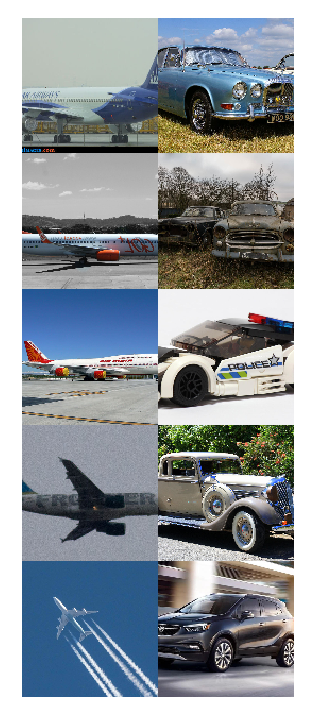

In [16]:
from numpy.random import randint

# Количество цифр
k = 2
# Количество примеров
exn = 5
# Создаем массивы для каждого объекта
objects = [[] for _ in range(k)]
# Создаем случайный массив для картинок - примеров написания цифр
nums = randint(0, D.shape[1], exn)

# Добавляем изображения в соответствующие массивы
for i in range(k):
    for j in nums:
        objects[i].append(D[i, j])

# Склеиваем массивы по вертикали, чтобы создать прямоугольник изображений
img = []
for i in range(k):
    img.append(np.vstack(objects[i]))

img = np.hstack(img)

fig, ax = plt.subplots(figsize=(k, exn),dpi=180)

# Отображаем итоговое изображение
plt.imshow(img, cmap='Greys', interpolation='none')
plt.axis('equal')
plt.axis('off')
plt.show()

In [17]:
wdth = img_size 
hdth = img_size 

n = wdth * hdth
N = 2000

X = np.zeros((n, N))
k = 0
for i in range(2):
    for j in range(1000):
        X[:, k] = numpy2vec(RGB2GRAY(D[i, j]), method='diag').T
        k += 1

ones_vector = np.ones((X.shape[1], 1))
Xt = X - X.dot(ones_vector).dot(ones_vector.T)/N  # матрица Xt будет размерности 784 на 10000


In [18]:
U, S, V = np.linalg.svd(Xt, full_matrices=False)

UU = U[:, :p]
#T = np.random.rand(p, p) * 0.01
T = np.eye(p,p) * 0.01

In [19]:
# https://ru.wikipedia.org/wiki/Функция_Хевисайда
# https://ru.wikipedia.org/wiki/Функция_активации

def activation(u):
    coeff_a = 0
    dx = 0.0000001
    coeff_k1 = 10/dx #0.5
    retval = 1 / (1 + np.exp(-2.0 * coeff_k1 * (u + coeff_a)))
    return retval

coeff_a = 0;
dx = 0.0000001
coeff_k1 = 10/dx

alpha0 = 1 / (np.exp(-2*coeff_a*coeff_k1) + 1);
alpha1 = 2 * coeff_k1 * np.exp(2*coeff_a*coeff_k1) / ( np.exp(2*coeff_a*coeff_k1) + 1 )**2;


In [20]:
W1 = (1/alpha1) * T @ UU.T
W2 = UU @ np.linalg.inv(T)

w1 = -(1/alpha1) * T @ UU.T @ (X @ np.ones((N, 1)) / N)
w2 = (np.eye(n) - UU @ UU.T) @ (X @ np.ones((N, 1)) / N) - alpha0 * UU @ np.linalg.inv(T) @ np.ones((p, 1)) -alpha1 * UU @ np.linalg.inv(T) @ w1

np.save('matrix_w1.npy', W1)
np.save('vector_w1.npy', w1)

In [21]:
# автокодировщик
# XX = np.empty((hdth, 0))
# YY = np.empty((hdth, 0))

# fig, ((ax1), (ax2)) = plt.subplots(2, 1,figsize=(10, 2), dpi=180)

# for digit in range(2):
#     image_num = 600 + digit + np.random.randint(10)
#     B = np.dot(W1, RGB2GRAY(D[digit, image_num]).reshape(n, 1)) + w1
#     H = activation(B)
#     Y = np.dot(W2, H) + w2
#     XX = np.hstack((XX, RGB2GRAY(D[digit, image_num]).reshape(wdth, hdth)))
#     YY = np.hstack((YY, Y.reshape(wdth, hdth)))
    
# ax1.imshow(XX, cmap='gray', aspect='equal')
# ax1.axis('off')
# ax2.imshow(YY, cmap='gray', aspect='equal')
# ax2.axis('off')

In [22]:
def get_vector_by_image(W1,w1,img):
    
    lgth = img.shape[0] * img.shape[1]
    B = np.dot(W1, img.reshape(lgth, 1)) + w1
    
    result = activation(B)
    
    return result

In [23]:
V = np.zeros((p, N))
k = 0
for i in range(2):
    for j in range(1000):
        V[:, k] = get_vector_by_image(W1,w1,RGB2GRAY(D[i,j])).T
        k += 1 

In [24]:
#binary_array with Harr
def dec2bin_Harr(vec=[], current_depth=1, max_depth=max_depth):
    size = len(vec)
    if size == 1:
        return [0]
    elif size == 2:
        return [1] if vec[0] > vec[1] else [0]
    elif current_depth > max_depth:
        return []
    else:
        median_index = size // 2
        left_sum, right_sum = sum(vec[:median_index]), sum(vec[median_index:])
        if left_sum > right_sum:
            return dec2bin_Harr(vec[:median_index], current_depth + 1, max_depth) + [1] + dec2bin_Harr(vec[median_index:], current_depth + 1, max_depth)
        else:
            return dec2bin_Harr(vec[:median_index], current_depth + 1, max_depth) + [0] + dec2bin_Harr(vec[median_index:], current_depth + 1, max_depth)
        
a = [1, 2, 3, 4]
assert dec2bin_Harr(a) == [0, 0, 0]

In [25]:
dec2bin_Harr([4, 8, 5, 6, 7, 3])

[0, 0, 1, 1, 0, 0, 1]

In [26]:
def get_binary_vector_by_image(W1,w1,img):
    
    result = get_vector_by_image(W1,w1,img)
    
    bin_result = dec2bin_Harr(list(result))
    
    return np.array(bin_result)

In [27]:
Vb = np.zeros((p, N))
k = 0
tuple_imgs = []

for j in range(N // 2):
#     Vb[:, k] = get_binary_vector_by_image(W1,w1,RGB2GRAY(D[0,j]))
    tuple_imgs.append(tuple([j, "airplane", get_binary_vector_by_image(W1,w1,RGB2GRAY(D[0,j]))]))
    k += 1

for j in range(N // 2):
#     Vb[:, k] = get_binary_vector_by_image(W1,w1,RGB2GRAY(D[1,j]))
    tuple_imgs.append(tuple([N // 2 + j, "cars", get_binary_vector_by_image(W1,w1,RGB2GRAY(D[1,j]))]))
    k += 1

In [28]:
test_imgs_bin, search_imgs_bin = test_search_split(tuple_imgs)

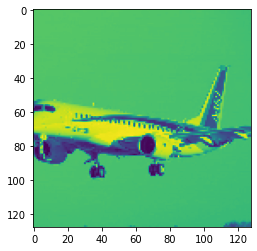

In [29]:
plt.imshow(RGB2GRAY(D[0, 0]))

In [30]:
# #binary_array with median
# def dec2bin(vec, method="mean", max_depth=max_depth):
#     if (method == "mean"):
#         med = np.median(vec)
#         binary_array = [int(x >= med) for x in vec]
#         return binary_array
#     elif (method == "Harr"):
#         return dec2bin_Harr(vec, max_depth=max_depth)
    
# a = [1, 2, 3, 4, 3, 2, 1]
# #sorted_a: 1 1 2 2 3 3 4
# assert dec2bin(a, "mean") == [0, 1, 1, 1, 1, 1, 0]

In [31]:
# #для поискового датасета
# start_time = time.time()
# search_N = len(search_imgs)
# search_imgs_bin = []

# for i in range(search_N):
#     search_imgs_bin.append((search_imgs_vec[i][0], search_imgs_vec[i][1],
#                             dec2bin(search_imgs_vec[i][2], method=dec2bin_method)))

# #для тестового датасета
# test_N = len(test_imgs)
# test_imgs_bin = []

# for i in range(test_N):
#     test_imgs_bin.append((test_imgs_tuple[i][0], test_imgs_tuple[i][1],
#                           dec2bin(test_imgs_vec[i][2], method=dec2bin_method)))

# print("--- %s seconds ---" % (time.time() - start_time))

In [32]:
# search_imgs_bin_number = []
# search_imgs_bin_name = []
# search_imgs_bin_ = []
# for search_img_bin in search_imgs_bin:
#     search_imgs_bin_number.append(search_img_bin[0])
#     search_imgs_bin_name.append(search_img_bin[1])
#     search_imgs_bin_.append(search_img_bin[2])

In [33]:
# df_search_imgs = pd.DataFrame({"number":search_imgs_bin_number, "class":search_imgs_bin_name, "bin":search_imgs_bin_})
# df_search_imgs.to_csv("data_//search_imgs.csv", sep='\t', index=False)

In [34]:
from math import sqrt
from numpy import dot
from numpy.linalg import norm

def my_hamming_distance(bin1, bin2):
    dist = 0
    for n in range(len(bin1)):
        if bin1[n] != bin2[n]:
            dist += 1
    
    return dist

a = [1, 0, 1, 1, 1, 0, 1]
b = [1, 0, 0, 1, 0, 0, 1]
assert my_hamming_distance(a, b) == 2

def my_cos_distance(bin1, bin2):
    count_one, sum_bin1, sum_bin2 = 0, 0, 0
    for i in range(len(bin1)):
        count_one += bin1[i] * bin2[i]
        sum_bin1 += bin1[i] #bin1[i]**2
        sum_bin2 += bin2[i] #bin2[i]**2
    return 1 - count_one / (sqrt(sum_bin1) * sqrt(sum_bin2))

a, b = [1, 1, 0, 0], [1, 0, 0, 0] 
assert my_cos_distance(a, b) == 0.29289321881345254

def my_euclid_distance(bin1, bin2):
    dist = 0
    for i in range(len(bin1)):
        dist += (bin1[i] - bin2[i]) ** 2
    return sqrt(dist)

a = [1, 0, 1, 1, 1, 0, 1]
b = [1, 0, 0, 1, 0, 0, 1]
assert my_euclid_distance(a, b) == 1.4142135623730951

def hamming_distance(bin1, bin2):
    bin1 = np.array(bin1)
    bin2 = np.array(bin2)
    return np.count_nonzero(bin1 != bin2)


def hamming_distance(bin1, bin2):
    x = np.array(bin1)
    y = np.array(bin2)  
    return np.sum(x != y)

a = [1, 0, 1, 1, 1, 0, 1]
b = [1, 0, 0, 1, 0, 0, 1]
assert hamming_distance(a, b) == 2
assert hamming_distance(a, b) == my_hamming_distance(a, b)

def cos_distance(bin1, bin2):
    return 1 - dot(bin1, bin2) / (norm(bin1) * norm(bin2))

a, b = [1, 1, 0, 0], [1, 0, 0, 0] 
assert cos_distance(a, b) == 0.29289321881345254
assert cos_distance(a, b) == my_cos_distance(a, b)

def euclid_distance(bin1, bin2):
    bin1 = np.array(bin1)
    bin2 = np.array(bin2)
    return norm(bin1 - bin2)

a = [1, 0, 1, 1, 1, 0, 1]
b = [1, 0, 0, 1, 0, 0, 1]
assert euclid_distance(a, b) == 1.4142135623730951
assert euclid_distance(a, b) == my_euclid_distance(a, b)

def norm_hamming_distance(bin1, bin2):
    return hamming_distance(bin1, bin2) / len(bin1)

def my_norm_hamming_distance(bin1, bin2):
    return my_hamming_distance(bin1, bin2) / len(bin1)

def norm_euclid_distance(bin1, bin2):
    return euclid_distance(bin1, bin2) / len(bin1)

def distance(bin1, bin2, method="hamming"):
    if method == "my_hamming":
        return my_hamming_distance(bin1, bin2)
    elif method == "my_cos":
        return my_cos_distance(bin1, bin2)
    elif method == "my_euclid":
        return my_euclid_distance(bin1, bin2)
    elif method == "hamming":
        return hamming_distance(bin1, bin2)
    elif method == "cos":
        return cos_distance(bin1, bin2)
    elif method == "euclid":
        return euclid_distance(bin1, bin2)
    elif method == "norm_hamming":
        return norm_hamming_distance(bin1, bin2)
    elif method == "norm_euclid":
        return norm_euclid_distance(bin1, bin2)
    elif method == "my_norm_hamming":
        return my_norm_hamming_distance(bin1, bin2)

def show_heatmap(table):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.heatmap(table, ax=ax)


In [35]:
import time
start_time = time.time()
#номер, класс т, номер, класс п, расстояние по Хэмминге
hamming_distance_matrix = []
#distance_method="my_norm_hamming"
test_N = 600
search_N = 1400
for i in range(test_N):
    hamming_distance_list = []
    for j in range(search_N):
        hamming_distance_list.append((test_imgs_bin[i][0], test_imgs_bin[i][1],
                                      search_imgs_bin[j][0], search_imgs_bin[j][1],
                                      distance(test_imgs_bin[i][2], search_imgs_bin[j][2], method=distance_method)))
    hamming_distance_matrix.append(hamming_distance_list)
print("--- %s seconds ---" % (time.time() - start_time))

--- 10.087907314300537 seconds ---


In [36]:
distance(test_imgs_bin[i][2], search_imgs_bin[j][2], method=distance_method)

610

In [37]:
pd.DataFrame(hamming_distance_matrix)

,0,1,2,3,4,5,6,7,8,9,...,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399
0,"(1431, cars, 452, airplane, 604)","(1431, cars, 1855, cars, 614)","(1431, cars, 453, airplane, 635)","(1431, cars, 1391, cars, 673)","(1431, cars, 564, airplane, 601)","(1431, cars, 1982, cars, 646)","(1431, cars, 802, airplane, 550)","(1431, cars, 1456, cars, 441)","(1431, cars, 64, airplane, 497)","(1431, cars, 1679, cars, 678)",...,"(1431, cars, 125, airplane, 606)","(1431, cars, 395, airplane, 646)","(1431, cars, 478, airplane, 668)","(1431, cars, 1857, cars, 624)","(1431, cars, 1312, cars, 634)","(1431, cars, 196, airplane, 677)","(1431, cars, 683, airplane, 577)","(1431, cars, 1932, cars, 666)","(1431, cars, 1013, cars, 624)","(1431, cars, 1206, cars, 593)"
1,"(1479, cars, 452, airplane, 550)","(1479, cars, 1855, cars, 506)","(1479, cars, 453, airplane, 543)","(1479, cars, 1391, cars, 523)","(1479, cars, 564, airplane, 541)","(1479, cars, 1982, cars, 544)","(1479, cars, 802, airplane, 602)","(1479, cars, 1456, cars, 589)","(1479, cars, 64, airplane, 563)","(1479, cars, 1679, cars, 558)",...,"(1479, cars, 125, airplane, 588)","(1479, cars, 395, airplane, 522)","(1479, cars, 478, airplane, 504)","(1479, cars, 1857, cars, 564)","(1479, cars, 1312, cars, 524)","(1479, cars, 196, airplane, 523)","(1479, cars, 683, airplane, 529)","(1479, cars, 1932, cars, 574)","(1479, cars, 1013, cars, 622)","(1479, cars, 1206, cars, 573)"
2,"(365, airplane, 452, airplane, 501)","(365, airplane, 1855, cars, 525)","(365, airplane, 453, airplane, 424)","(365, airplane, 1391, cars, 502)","(365, airplane, 564, airplane, 620)","(365, airplane, 1982, cars, 565)","(365, airplane, 802, airplane, 571)","(365, airplane, 1456, cars, 602)","(365, airplane, 64, airplane, 578)","(365, airplane, 1679, cars, 531)",...,"(365, airplane, 125, airplane, 539)","(365, airplane, 395, airplane, 515)","(365, airplane, 478, airplane, 393)","(365, airplane, 1857, cars, 537)","(365, airplane, 1312, cars, 569)","(365, airplane, 196, airplane, 552)","(365, airplane, 683, airplane, 540)","(365, airplane, 1932, cars, 567)","(365, airplane, 1013, cars, 589)","(365, airplane, 1206, cars, 654)"
3,"(1488, cars, 452, airplane, 589)","(1488, cars, 1855, cars, 539)","(1488, cars, 453, airplane, 568)","(1488, cars, 1391, cars, 588)","(1488, cars, 564, airplane, 626)","(1488, cars, 1982, cars, 631)","(1488, cars, 802, airplane, 599)","(1488, cars, 1456, cars, 546)","(1488, cars, 64, airplane, 604)","(1488, cars, 1679, cars, 595)",...,"(1488, cars, 125, airplane, 561)","(1488, cars, 395, airplane, 559)","(1488, cars, 478, airplane, 589)","(1488, cars, 1857, cars, 609)","(1488, cars, 1312, cars, 645)","(1488, cars, 196, airplane, 608)","(1488, cars, 683, airplane, 588)","(1488, cars, 1932, cars, 639)","(1488, cars, 1013, cars, 579)","(1488, cars, 1206, cars, 590)"
4,"(1533, cars, 452, airplane, 596)","(1533, cars, 1855, cars, 626)","(1533, cars, 453, airplane, 613)","(1533, cars, 1391, cars, 581)","(1533, cars, 564, airplane, 543)","(1533, cars, 1982, cars, 530)","(1533, cars, 802, airplane, 570)","(1533, cars, 1456, cars, 559)","(1533, cars, 64, airplane, 505)","(1533, cars, 1679, cars, 538)",...,"(1533, cars, 125, airplane, 630)","(1533, cars, 395, airplane, 616)","(1533, cars, 478, airplane, 558)","(1533, cars, 1857, cars, 596)","(1533, cars, 1312, cars, 542)","(1533, cars, 196, airplane, 551)","(1533, cars, 683, airplane, 505)","(1533, cars, 1932, cars, 560)","(1533, cars, 1013, cars, 586)","(1533, cars, 1206, cars, 539)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,"(1240, cars, 452, airplane, 657)","(1240, cars, 1855, cars, 599)","(1240, cars, 453, airplane, 594)","(1240, cars, 1391, cars, 640)","(1240, cars, 564, airplane, 546)","(1240, cars, 1982, cars, 539)","(1240, cars, 802, airplane, 559)","(1240, cars, 1456, cars, 532)","(1240, cars, 64, airplane, 566)","(1240, cars, 1679, cars, 589)",...,"(1240, cars, 125, airplane, 593)","(1240, cars, 395, airpla

In [38]:
def sort_distance(distance_matrix):
    res = []
    n = len(distance_matrix)
    for i in range(n):
        a = sorted(distance_matrix[i], key=lambda x: x[4])
        res.append(a)
    
    return res

In [39]:
start_time = time.time()
sorted_h_distance = sort_distance(hamming_distance_matrix)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.22505402565002441 seconds ---


In [40]:
pd.DataFrame(sorted_h_distance).head(10)

,0,1,2,3,4,5,6,7,8,9,...,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399
0,"(1431, cars, 761, airplane, 427)","(1431, cars, 1456, cars, 441)","(1431, cars, 961, airplane, 452)","(1431, cars, 910, airplane, 456)","(1431, cars, 290, airplane, 458)","(1431, cars, 176, airplane, 460)","(1431, cars, 746, airplane, 465)","(1431, cars, 246, airplane, 466)","(1431, cars, 562, airplane, 468)","(1431, cars, 363, airplane, 471)",...,"(1431, cars, 33, airplane, 712)","(1431, cars, 1906, cars, 715)","(1431, cars, 660, airplane, 717)","(1431, cars, 674, airplane, 720)","(1431, cars, 675, airplane, 721)","(1431, cars, 345, airplane, 726)","(1431, cars, 580, airplane, 727)","(1431, cars, 1324, cars, 728)","(1431, cars, 386, airplane, 729)","(1431, cars, 1847, cars, 731)"
1,"(1479, cars, 933, airplane, 451)","(1479, cars, 1816, cars, 452)","(1479, cars, 929, airplane, 461)","(1479, cars, 1986, cars, 462)","(1479, cars, 705, airplane, 469)","(1479, cars, 1265, cars, 470)","(1479, cars, 479, airplane, 472)","(1479, cars, 114, airplane, 474)","(1479, cars, 1815, cars, 474)","(1479, cars, 951, airplane, 476)",...,"(1479, cars, 1478, cars, 675)","(1479, cars, 1755, cars, 676)","(1479, cars, 852, airplane, 679)","(1479, cars, 1892, cars, 680)","(1479, cars, 1586, cars, 683)","(1479, cars, 42, airplane, 683)","(1479, cars, 826, airplane, 684)","(1479, cars, 832, airplane, 686)","(1479, cars, 1716, cars, 688)","(1479, cars, 74, airplane, 689)"
2,"(365, airplane, 397, airplane, 308)","(365, airplane, 518, airplane, 343)","(365, airplane, 183, airplane, 374)","(365, airplane, 580, airplane, 374)","(365, airplane, 705, airplane, 378)","(365, airplane, 443, airplane, 383)","(365, airplane, 256, airplane, 386)","(365, airplane, 723, airplane, 389)","(365, airplane, 664, airplane, 389)","(365, airplane, 446, airplane, 389)",...,"(365, airplane, 936, airplane, 690)","(365, airplane, 1231, cars, 692)","(365, airplane, 145, airplane, 692)","(365, airplane, 692, airplane, 693)","(365, airplane, 1903, cars, 697)","(365, airplane, 454, airplane, 702)","(365, airplane, 1694, cars, 703)","(365, airplane, 1155, cars, 709)","(365, airplane, 1537, cars, 719)","(365, airplane, 1653, cars, 735)"
3,"(1488, cars, 910, airplane, 485)","(1488, cars, 945, airplane, 493)","(1488, cars, 1787, cars, 497)","(1488, cars, 961, airplane, 499)","(1488, cars, 1913, cars, 503)","(1488, cars, 1321, cars, 505)","(1488, cars, 1589, cars, 508)","(1488, cars, 375, airplane, 508)","(1488, cars, 1201, cars, 509)","(1488, cars, 1933, cars, 509)",...,"(1488, cars, 1803, cars, 671)","(1488, cars, 1681, cars, 673)","(1488, cars, 1019, cars, 677)","(1488, cars, 1355, cars, 677)","(1488, cars, 1154, cars, 679)","(1488, cars, 1339, cars, 687)","(1488, cars, 1411, cars, 688)","(1488, cars, 1346, cars, 689)","(1488, cars, 1446, cars, 694)","(1488, cars, 1232, cars, 694)"
4,"(1533, cars, 1367, cars, 450)","(1533, cars, 1880, cars, 466)","(1533, cars, 1116, cars, 469)","(1533, cars, 851, airplane, 471)","(1533, cars, 1202, cars, 473)","(1533, cars, 437, airplane, 474)","(1533, cars, 214, airplane, 475)","(1533, cars, 6, airplane, 476)","(1533, cars, 962, airplane, 477)","(1533, cars, 569, airplane, 479)",...,"(1533, cars, 413, airplane, 684)","(1533, cars, 1620, cars, 686)","(1533, cars, 1697, cars, 686)","(1533, cars, 782, airplane, 688)","(1533, cars, 949, airplane, 697)","(1533, cars, 312, airplane, 701)","(1533, cars, 585, airplane, 703)","(1533, cars, 380, airplane, 706)","(1533, cars, 664, airplane, 710)","(1533, cars, 17, airplane, 711)"
5,"(780, airplane, 207, airplane, 379)","(780, airplane, 820, airplane, 388)","(780, airplane, 308, airplane, 395)","(780, airplane, 991, airplane, 397)","(780, airplane, 331, airplane, 402)","(780, airplane, 603, airplane, 406)","(780, airplane, 495, airplane, 410)","(780, airplane, 339, airplane, 414)","(780, airplane, 542, airplane, 417)","(780, airplane, 652, airplane, 418)",...,"(780, airplane, 193, airplane, 664)","(780, airplane, 1530, cars, 664)","(780

In [41]:
def class_by_matrix(info):
    if info[1] != info[3]:
        return 0
    else:
        return 1

In [42]:
def bad_color(val):
    result = 'black'
    if (not val):
        result = 'red'
    return (result)

In [43]:
def pretty_axis(plt, ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_axis_off()
    plt.tick_params(
        left=False,
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False
    ) # labels along the bottom edge are off

In [44]:
sorted_h_distance[0][0]

(1431, 'cars', 761, 'airplane', 427)

In [45]:
# plt.imshow(imgs_tuple[1050][2])

In [46]:
sorted_distance = sorted_h_distance
def show_i_nearest_img(i, j, r, k):
    nearest_img_info = sorted_distance[i][j]
    search_index, search_name = nearest_img_info[2], nearest_img_info[3]
    # рисуем изображение поисковой выборки
    ax = fig.add_subplot(4, r, k + r + j * r)
    plt.imshow(RGB2GRAY(imgs_gray[search_index]), cmap='gray')
    pretty_axis(plt, ax)
    
    # проверка на совпадение классов
    if (not class_by_matrix(nearest_img_info)):
        plt.title(search_name, color=bad_color(class_by_matrix(nearest_img_info)))
        return 1
    else:
        plt.title(search_name, color=bad_color(class_by_matrix(nearest_img_info)))

    return 0

10


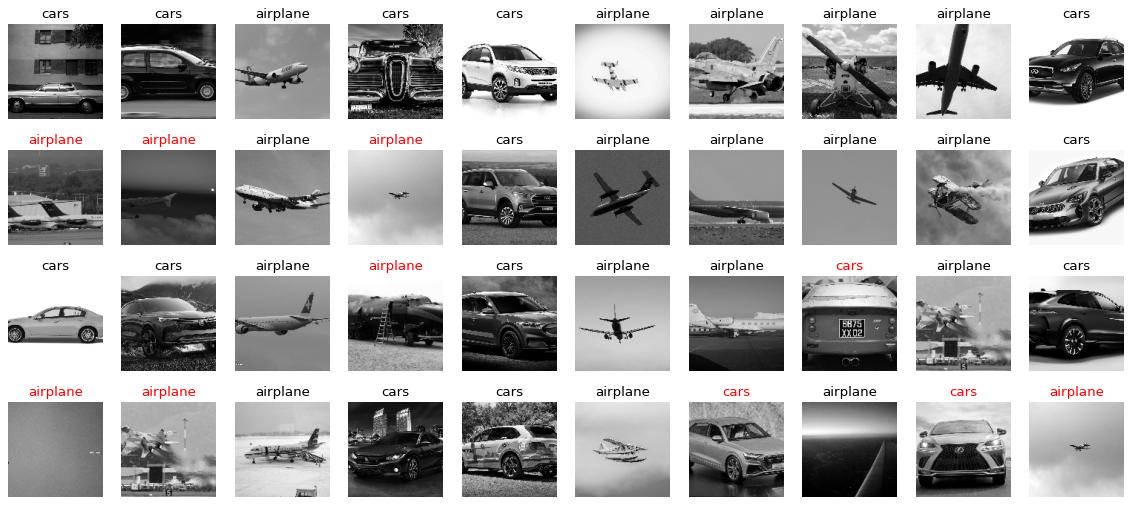

In [47]:
fig = plt.figure(figsize=(18, 8), dpi=80)

k = 1
r = 10
count_false = 0
for i in range(r):
    ax = fig.add_subplot(4, r, k)
    nearest_img_info = sorted_distance[i][0] # так как new_order[0] - это индекс самого изображения к которому ищем ближайшее
    test_index, test_name = nearest_img_info[0], nearest_img_info[1]
    # рисуем изображение тестовой выборки
    plt.imshow(RGB2GRAY(imgs_gray[test_index]), cmap='gray')
    pretty_axis(plt, ax)
    plt.title(test_name)
    
    count_false += show_i_nearest_img(i, 0, r, k)
    count_false += show_i_nearest_img(i, 1, r, k)
    count_false += show_i_nearest_img(i, 2, r, k)

    k = k + 1
    
    plt.savefig('imgs_auto_Harr.png', bbox_inches='tight')

print(count_false)

In [48]:
sorted_distance = sorted_h_distance

r = 600
count_false = 0
for i in range(r):
        nearest_img_info = sorted_distance[i][0] # так как new_order[0] - это индекс самого изображения к которому ищем ближайшее
        test_index, search_index = nearest_img_info[0], nearest_img_info[2]
        test_name, search_name = nearest_img_info[1], nearest_img_info[3]

        # проверка на совпадение классов
        if (not class_by_matrix(nearest_img_info)):
            count_false += 1

print("accuracy:", 1 - count_false / r)

accuracy: 0.6433333333333333


In [49]:
# создадим файл ближайших изображений
df_sorted_dist_3 = pd.DataFrame(sorted_distance).loc[:, 0:3]
df_sorted_dist_3.to_csv("data_//sorted_dist.csv", sep='\t', index=False)

In [50]:
df_sorted_dist_3

,0,1,2,3
0,"(1431, cars, 761, airplane, 427)","(1431, cars, 1456, cars, 441)","(1431, cars, 961, airplane, 452)","(1431, cars, 910, airplane, 456)"
1,"(1479, cars, 933, airplane, 451)","(1479, cars, 1816, cars, 452)","(1479, cars, 929, airplane, 461)","(1479, cars, 1986, cars, 462)"
2,"(365, airplane, 397, airplane, 308)","(365, airplane, 518, airplane, 343)","(365, airplane, 183, airplane, 374)","(365, airplane, 580, airplane, 374)"
3,"(1488, cars, 910, airplane, 485)","(1488, cars, 945, airplane, 493)","(1488, cars, 1787, cars, 497)","(1488, cars, 961, airplane, 499)"
4,"(1533, cars, 1367, cars, 450)","(1533, cars, 1880, cars, 466)","(1533, cars, 1116, cars, 469)","(1533, cars, 851, airplane, 471)"
...,...,...,...,...
595,"(1240, cars, 961, airplane, 455)","(1240, cars, 1066, cars, 458)","(1240, cars, 1537, cars, 459)","(1240, cars, 1338, cars, 460)"
596,"(691, airplane, 548, airplane, 366)","(691, airplane, 652, airplane, 369)","(691, airplane, 991, airplane, 380)","(691, airplane, 924, airplane, 389)"
597,"(1617, cars, 344, airplane, 420)","(1617, cars, 1054, cars, 445)","(1617, cars, 547, airplane, 445)","(1617, cars, 1864, cars, 461)"
598,"(982, airplane, 564, airplane, 345)","(982, airplane, 338, airplane, 389)","(982, airplane, 398, airplane, 403)","(982, airplane, 683, airplane, 413)"


In [51]:
# plt.figure(figsize=(18, 4))
# n = 10
# for i in range(n):
#     plt.subplot(1, n, i + 1)
#     plt.imshow(imgs[i])
#     plt.axis("off")

In [52]:
len(sorted_distance[0])

1400

In [53]:
graph = []
n = 600
m = 1400
for i in range(n):
    one_line = []
    for j in range(m):
        one_line.append(class_by_matrix(sorted_distance[i][j]))
    graph.append(one_line)

In [54]:
sorted_distance[0][0], sorted_distance[0][1]

((1431, 'cars', 761, 'airplane', 427), (1431, 'cars', 1456, 'cars', 441))

In [55]:
class_by_matrix(sorted_distance[0][0]), class_by_matrix(sorted_distance[0][1])

(0, 1)

In [56]:
pd.DataFrame(sorted_distance)

,0,1,2,3,4,5,6,7,8,9,...,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399
0,"(1431, cars, 761, airplane, 427)","(1431, cars, 1456, cars, 441)","(1431, cars, 961, airplane, 452)","(1431, cars, 910, airplane, 456)","(1431, cars, 290, airplane, 458)","(1431, cars, 176, airplane, 460)","(1431, cars, 746, airplane, 465)","(1431, cars, 246, airplane, 466)","(1431, cars, 562, airplane, 468)","(1431, cars, 363, airplane, 471)",...,"(1431, cars, 33, airplane, 712)","(1431, cars, 1906, cars, 715)","(1431, cars, 660, airplane, 717)","(1431, cars, 674, airplane, 720)","(1431, cars, 675, airplane, 721)","(1431, cars, 345, airplane, 726)","(1431, cars, 580, airplane, 727)","(1431, cars, 1324, cars, 728)","(1431, cars, 386, airplane, 729)","(1431, cars, 1847, cars, 731)"
1,"(1479, cars, 933, airplane, 451)","(1479, cars, 1816, cars, 452)","(1479, cars, 929, airplane, 461)","(1479, cars, 1986, cars, 462)","(1479, cars, 705, airplane, 469)","(1479, cars, 1265, cars, 470)","(1479, cars, 479, airplane, 472)","(1479, cars, 114, airplane, 474)","(1479, cars, 1815, cars, 474)","(1479, cars, 951, airplane, 476)",...,"(1479, cars, 1478, cars, 675)","(1479, cars, 1755, cars, 676)","(1479, cars, 852, airplane, 679)","(1479, cars, 1892, cars, 680)","(1479, cars, 1586, cars, 683)","(1479, cars, 42, airplane, 683)","(1479, cars, 826, airplane, 684)","(1479, cars, 832, airplane, 686)","(1479, cars, 1716, cars, 688)","(1479, cars, 74, airplane, 689)"
2,"(365, airplane, 397, airplane, 308)","(365, airplane, 518, airplane, 343)","(365, airplane, 183, airplane, 374)","(365, airplane, 580, airplane, 374)","(365, airplane, 705, airplane, 378)","(365, airplane, 443, airplane, 383)","(365, airplane, 256, airplane, 386)","(365, airplane, 723, airplane, 389)","(365, airplane, 664, airplane, 389)","(365, airplane, 446, airplane, 389)",...,"(365, airplane, 936, airplane, 690)","(365, airplane, 1231, cars, 692)","(365, airplane, 145, airplane, 692)","(365, airplane, 692, airplane, 693)","(365, airplane, 1903, cars, 697)","(365, airplane, 454, airplane, 702)","(365, airplane, 1694, cars, 703)","(365, airplane, 1155, cars, 709)","(365, airplane, 1537, cars, 719)","(365, airplane, 1653, cars, 735)"
3,"(1488, cars, 910, airplane, 485)","(1488, cars, 945, airplane, 493)","(1488, cars, 1787, cars, 497)","(1488, cars, 961, airplane, 499)","(1488, cars, 1913, cars, 503)","(1488, cars, 1321, cars, 505)","(1488, cars, 1589, cars, 508)","(1488, cars, 375, airplane, 508)","(1488, cars, 1201, cars, 509)","(1488, cars, 1933, cars, 509)",...,"(1488, cars, 1803, cars, 671)","(1488, cars, 1681, cars, 673)","(1488, cars, 1019, cars, 677)","(1488, cars, 1355, cars, 677)","(1488, cars, 1154, cars, 679)","(1488, cars, 1339, cars, 687)","(1488, cars, 1411, cars, 688)","(1488, cars, 1346, cars, 689)","(1488, cars, 1446, cars, 694)","(1488, cars, 1232, cars, 694)"
4,"(1533, cars, 1367, cars, 450)","(1533, cars, 1880, cars, 466)","(1533, cars, 1116, cars, 469)","(1533, cars, 851, airplane, 471)","(1533, cars, 1202, cars, 473)","(1533, cars, 437, airplane, 474)","(1533, cars, 214, airplane, 475)","(1533, cars, 6, airplane, 476)","(1533, cars, 962, airplane, 477)","(1533, cars, 569, airplane, 479)",...,"(1533, cars, 413, airplane, 684)","(1533, cars, 1620, cars, 686)","(1533, cars, 1697, cars, 686)","(1533, cars, 782, airplane, 688)","(1533, cars, 949, airplane, 697)","(1533, cars, 312, airplane, 701)","(1533, cars, 585, airplane, 703)","(1533, cars, 380, airplane, 706)","(1533, cars, 664, airplane, 710)","(1533, cars, 17, airplane, 711)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,"(1240, cars, 961, airplane, 455)","(1240, cars, 1066, cars, 458)","(1240, cars, 1537, cars, 459)","(1240, cars, 1338, cars, 460)","(1240, cars, 763, airplane, 465)","(1240, cars, 1072, cars, 471)","(1240, cars, 1729, cars, 471)","(1240, cars, 290, airplane, 473)","(1240, cars, 936, airplane, 476)","(1240, cars, 622, airplane, 476)",...,"(1240, cars, 312, airplane, 690)

In [57]:
import time
start_time = time.time()

n = search_N
y = []

dist_mean = pd.DataFrame(graph).mean()

for i in range(1, n):
    y.append(dist_mean[:i].mean())
y = 1 - np.array(y)
print(time.time() - start_time)

0.29413294792175293


In [58]:
n = search_N
x = [i for i in range(1, n)]

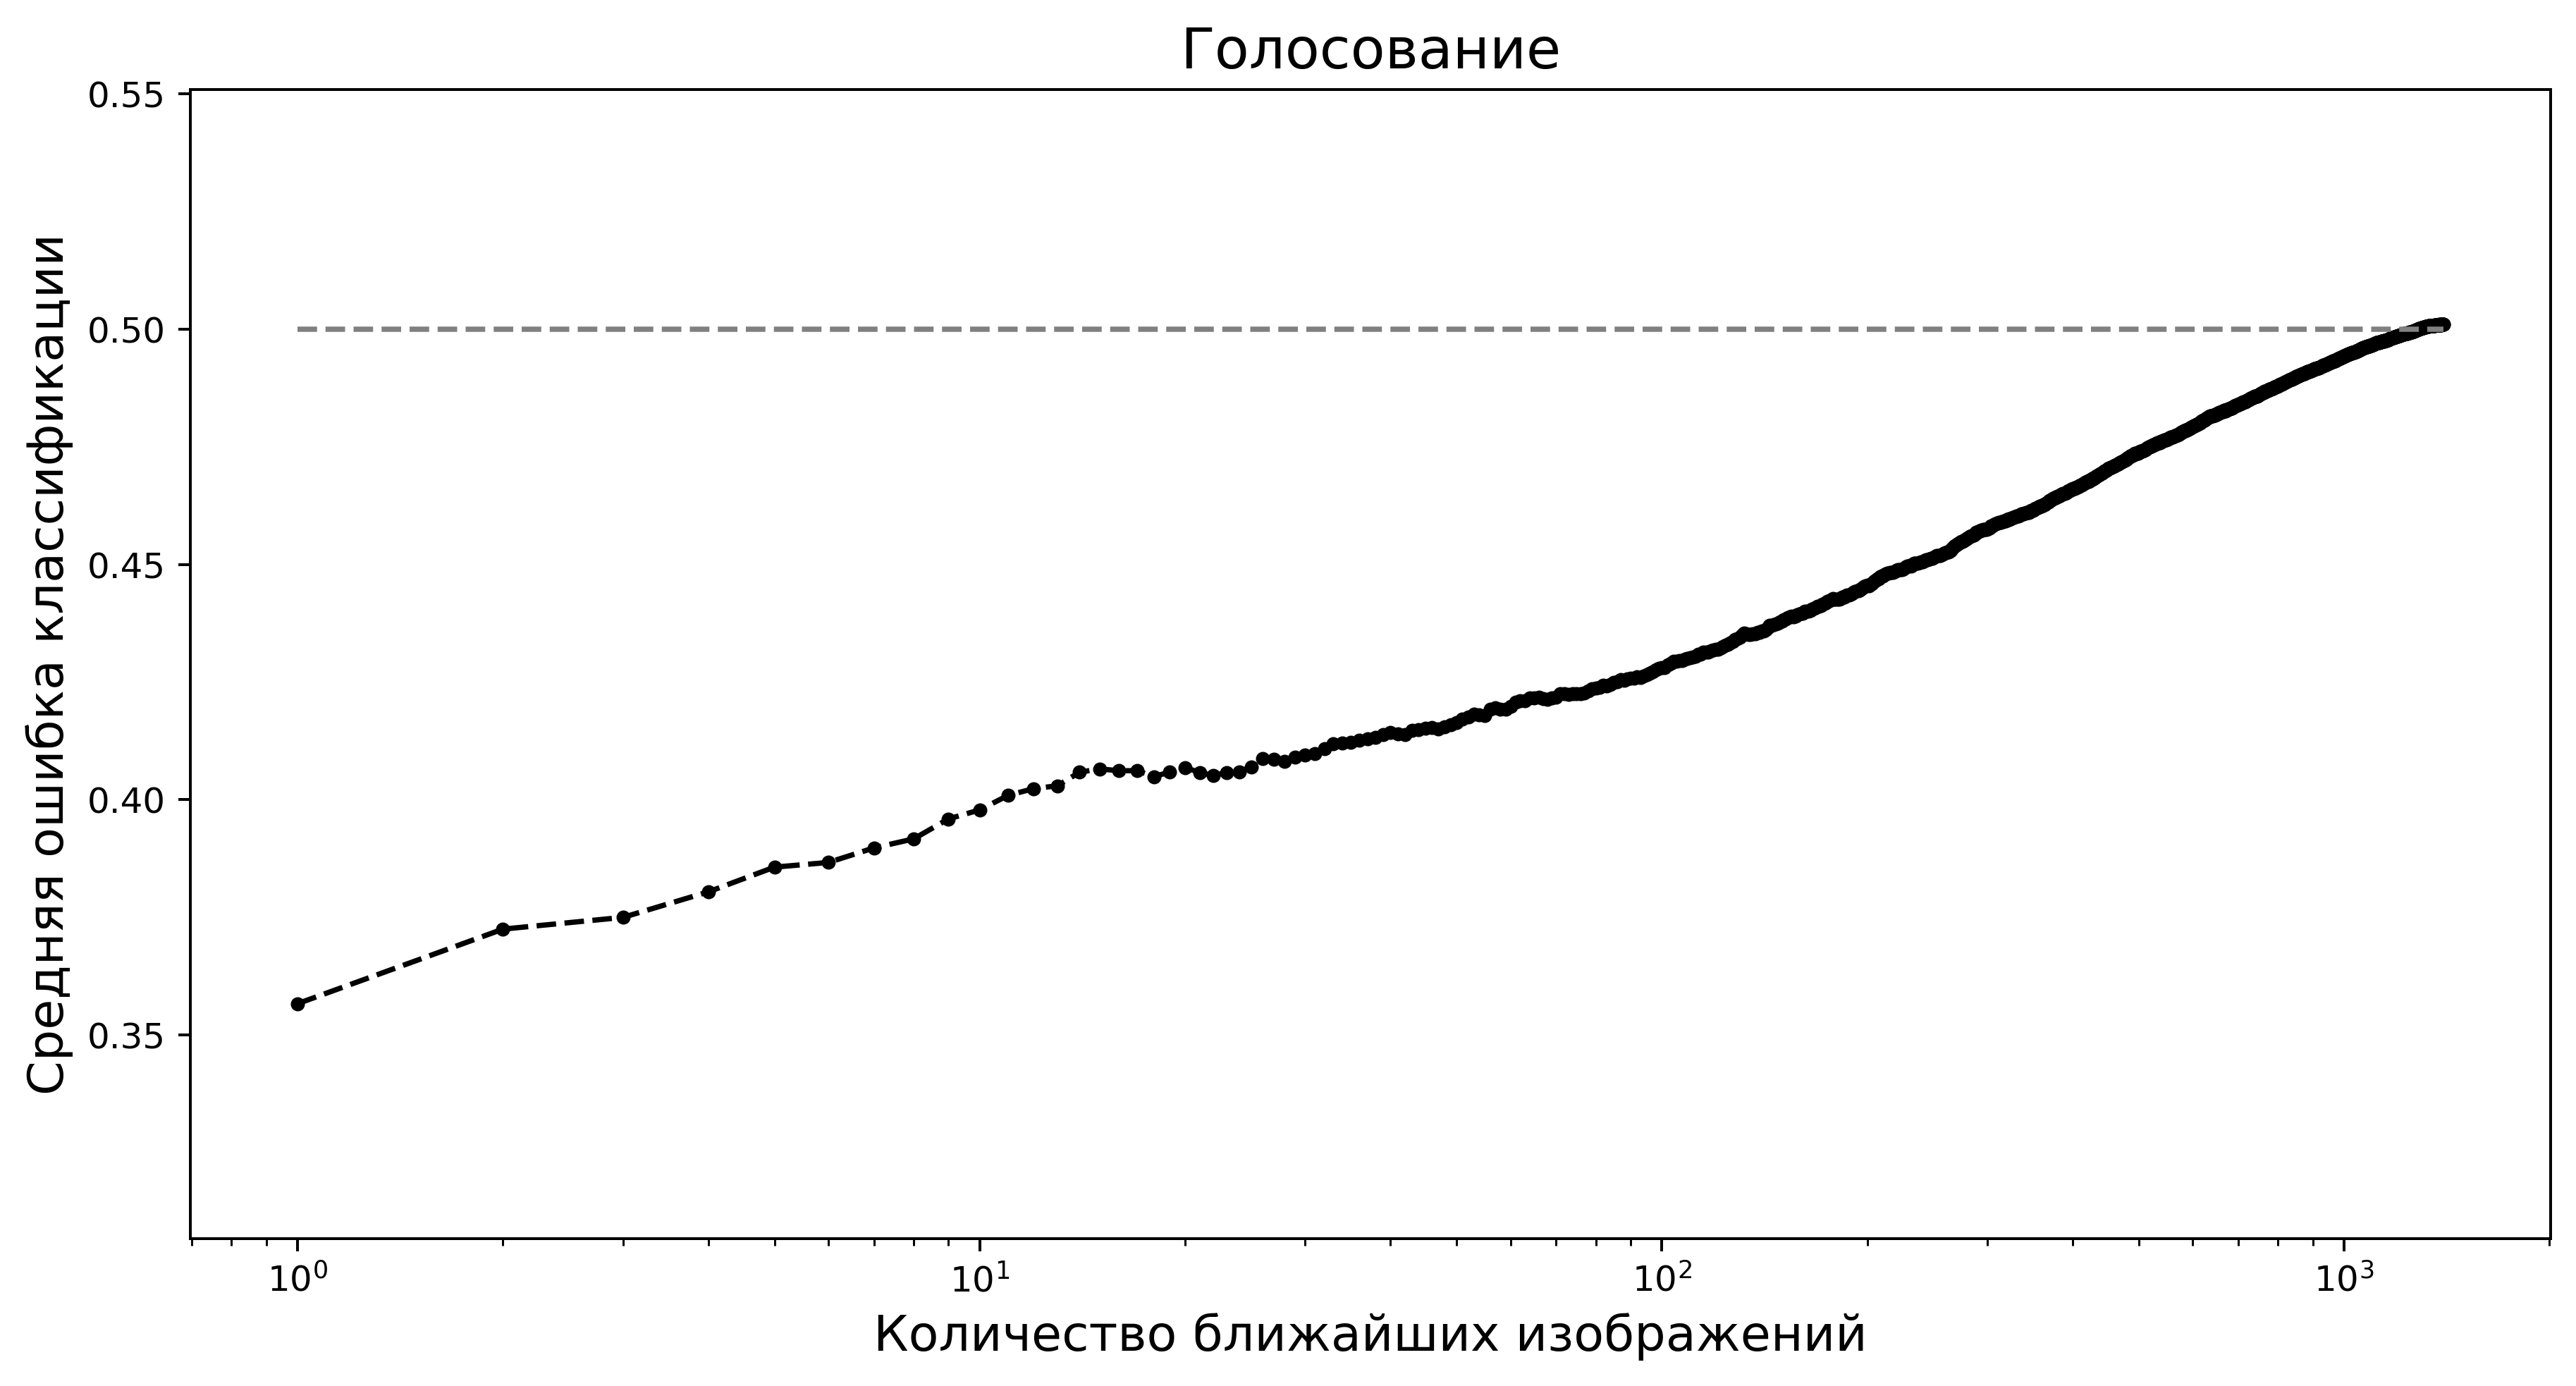

In [59]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=360)
ax.set_xscale('log')
plt.plot(x, y, linestyle="--", marker=".", color="black")
plt.hlines(0.5, np.min(x), np.max(x), linestyle="--", color='gray')
plt.ylim([y.min() - 0.05, y.max() + 0.05])
#plt.xlim([0, 100])
plt.xlabel('Количество ближайших изображений', fontsize=14)
plt.ylabel('Средняя ошибка классификации', fontsize=14)
plt.title('Голосование', fontsize=16)
plt.savefig('Voting_1_auto_Harr.png', bbox_inches='tight')
plt.show()

In [60]:
optimal_N = np.argmin(y) + 1
print("оптимпальный размер ближайших изображений:", optimal_N,
      "\nоценка ошибки (accuracy):", y[optimal_N])

оптимпальный размер ближайших изображений: 1 
оценка ошибки (accuracy): 0.37250000000000005


In [61]:
# https://ru.wikipedia.org/wiki/Функция_Хевисайда
# https://ru.wikipedia.org/wiki/Функция_активации

def activation(u):
    coeff_a = 0
    dx = 0.0000001
    coeff_k1 = 10/dx #0.5
    retval = 1 / (1 + np.exp(-2.0 * coeff_k1 * (u + coeff_a)))
    return retval

coeff_a = 0;
dx = 0.0000001
coeff_k1 = 10/dx

alpha0 = 1 / (np.exp(-2*coeff_a*coeff_k1) + 1);
alpha1 = 2 * coeff_k1 * np.exp(2*coeff_a*coeff_k1) / ( np.exp(2*coeff_a*coeff_k1) + 1 )**2;


def collect_data_for_graph(p): # размерность скрытого слоя
    print(p)
    # преобразование десятчного вектора в двоичный
    # для поискового датасета
    start_time = time.time()
    n = wdth * hdth # размерность входного и выходного слоев
    N = 2000 # объем входных данных
    
    U, S, V = np.linalg.svd(Xt, full_matrices=False)

    UU = U[:, :p]
    # T = np.random.rand(p, p) * 0.01
    T = np.eye(p,p) * 0.01
    
    print("T\t:", T.shape, "\n"
          "UU\t:", UU.shape)
    W1 = (1/alpha1) * T @ UU.T
    W2 = UU @ np.linalg.inv(T)

    w1 = -(1/alpha1) * T @ UU.T @ (X @ np.ones((N, 1)) / N)
    w2 = (np.eye(n) - UU @ UU.T) @ (X @ np.ones((N, 1)) / N) - alpha0 * UU @ np.linalg.inv(T) @ np.ones((p, 1)) - alpha1 * UU @ np.linalg.inv(T) @ w1

    np.save('matrix_w1.npy', W1)
    np.save('vector_w1.npy', w1)
    
    Vb = np.zeros((p, N))
    k = 0
    tuple_imgs = []
    for i in range(2):
        for j in range(1000):
            tuple_imgs.append(tuple([1000 * i + j, i, get_binary_vector_by_image(W1,w1,RGB2GRAY(D[i,j])).T]))
            k += 1

    # разбиение на тестовую и поисковую для проверки модели автокодировщика
    test_imgs_bin, search_imgs_bin = test_search_split(tuple_imgs, shuffle=False)
    
    # нахождение расстояния по Хэмминге
    # номер, класс т, номер, класс п, расстояние
    hamming_distance_matrix = []
    # distance_method="my_norm_hamming"
    for i in range(test_N):
        hamming_distance_list = []
        for j in range(search_N):
            hamming_distance_list.append((test_imgs_bin[i][0], test_imgs_bin[i][1],
                                          search_imgs_bin[j][0], search_imgs_bin[j][1],
                                          distance(test_imgs_bin[i][2], search_imgs_bin[j][2], method=distance_method)))
        hamming_distance_matrix.append(hamming_distance_list)
    
    sorted_h_distance = sort_distance(hamming_distance_matrix)

    graph = []
    n = 600
    m = 1400
    for i in range(n):
        one_line = []
        for j in range(m):
            one_line.append(class_by_matrix(sorted_h_distance[i][j]))
        graph.append(one_line)
    
    dist_mean = pd.DataFrame(graph).mean()
    print("--- %s seconds ---" % (time.time() - start_time))
    return dist_mean[:3].mean()

In [71]:
ps = np.linspace(10, N, num=10)
y = []
for p in ps:
    y.append(collect_data_for_graph(int(p)))


10
T	: (10, 10) 
UU	: (16384, 10)
--- 18.16187357902527 seconds ---
231
T	: (231, 231) 
UU	: (16384, 231)
--- 25.029226541519165 seconds ---
452
T	: (452, 452) 
UU	: (16384, 452)
--- 33.99260687828064 seconds ---
673
T	: (673, 673) 
UU	: (16384, 673)
--- 40.719765186309814 seconds ---
894
T	: (894, 894) 
UU	: (16384, 894)
--- 47.5945405960083 seconds ---
1115
T	: (1115, 1115) 
UU	: (16384, 1115)
--- 55.13972353935242 seconds ---
1336
T	: (1336, 1336) 
UU	: (16384, 1336)
--- 61.26908540725708 seconds ---
1557
T	: (1557, 1557) 
UU	: (16384, 1557)
--- 65.45828938484192 seconds ---
1778
T	: (1778, 1778) 
UU	: (16384, 1778)
--- 72.04264497756958 seconds ---
2000
T	: (2000, 2000) 
UU	: (16384, 2000)
--- 78.39993143081665 seconds ---


In [75]:
y = 1 - np.array(y)
n = len(y)
x = [i for i in ps][:len(y)]
# y[0] = 0.5
y

array([0.5       , 0.30277778, 0.26888889, 0.22      , 0.21777778,
       0.23      , 0.15388889, 0.17166667, 0.19388889, 0.24944444])

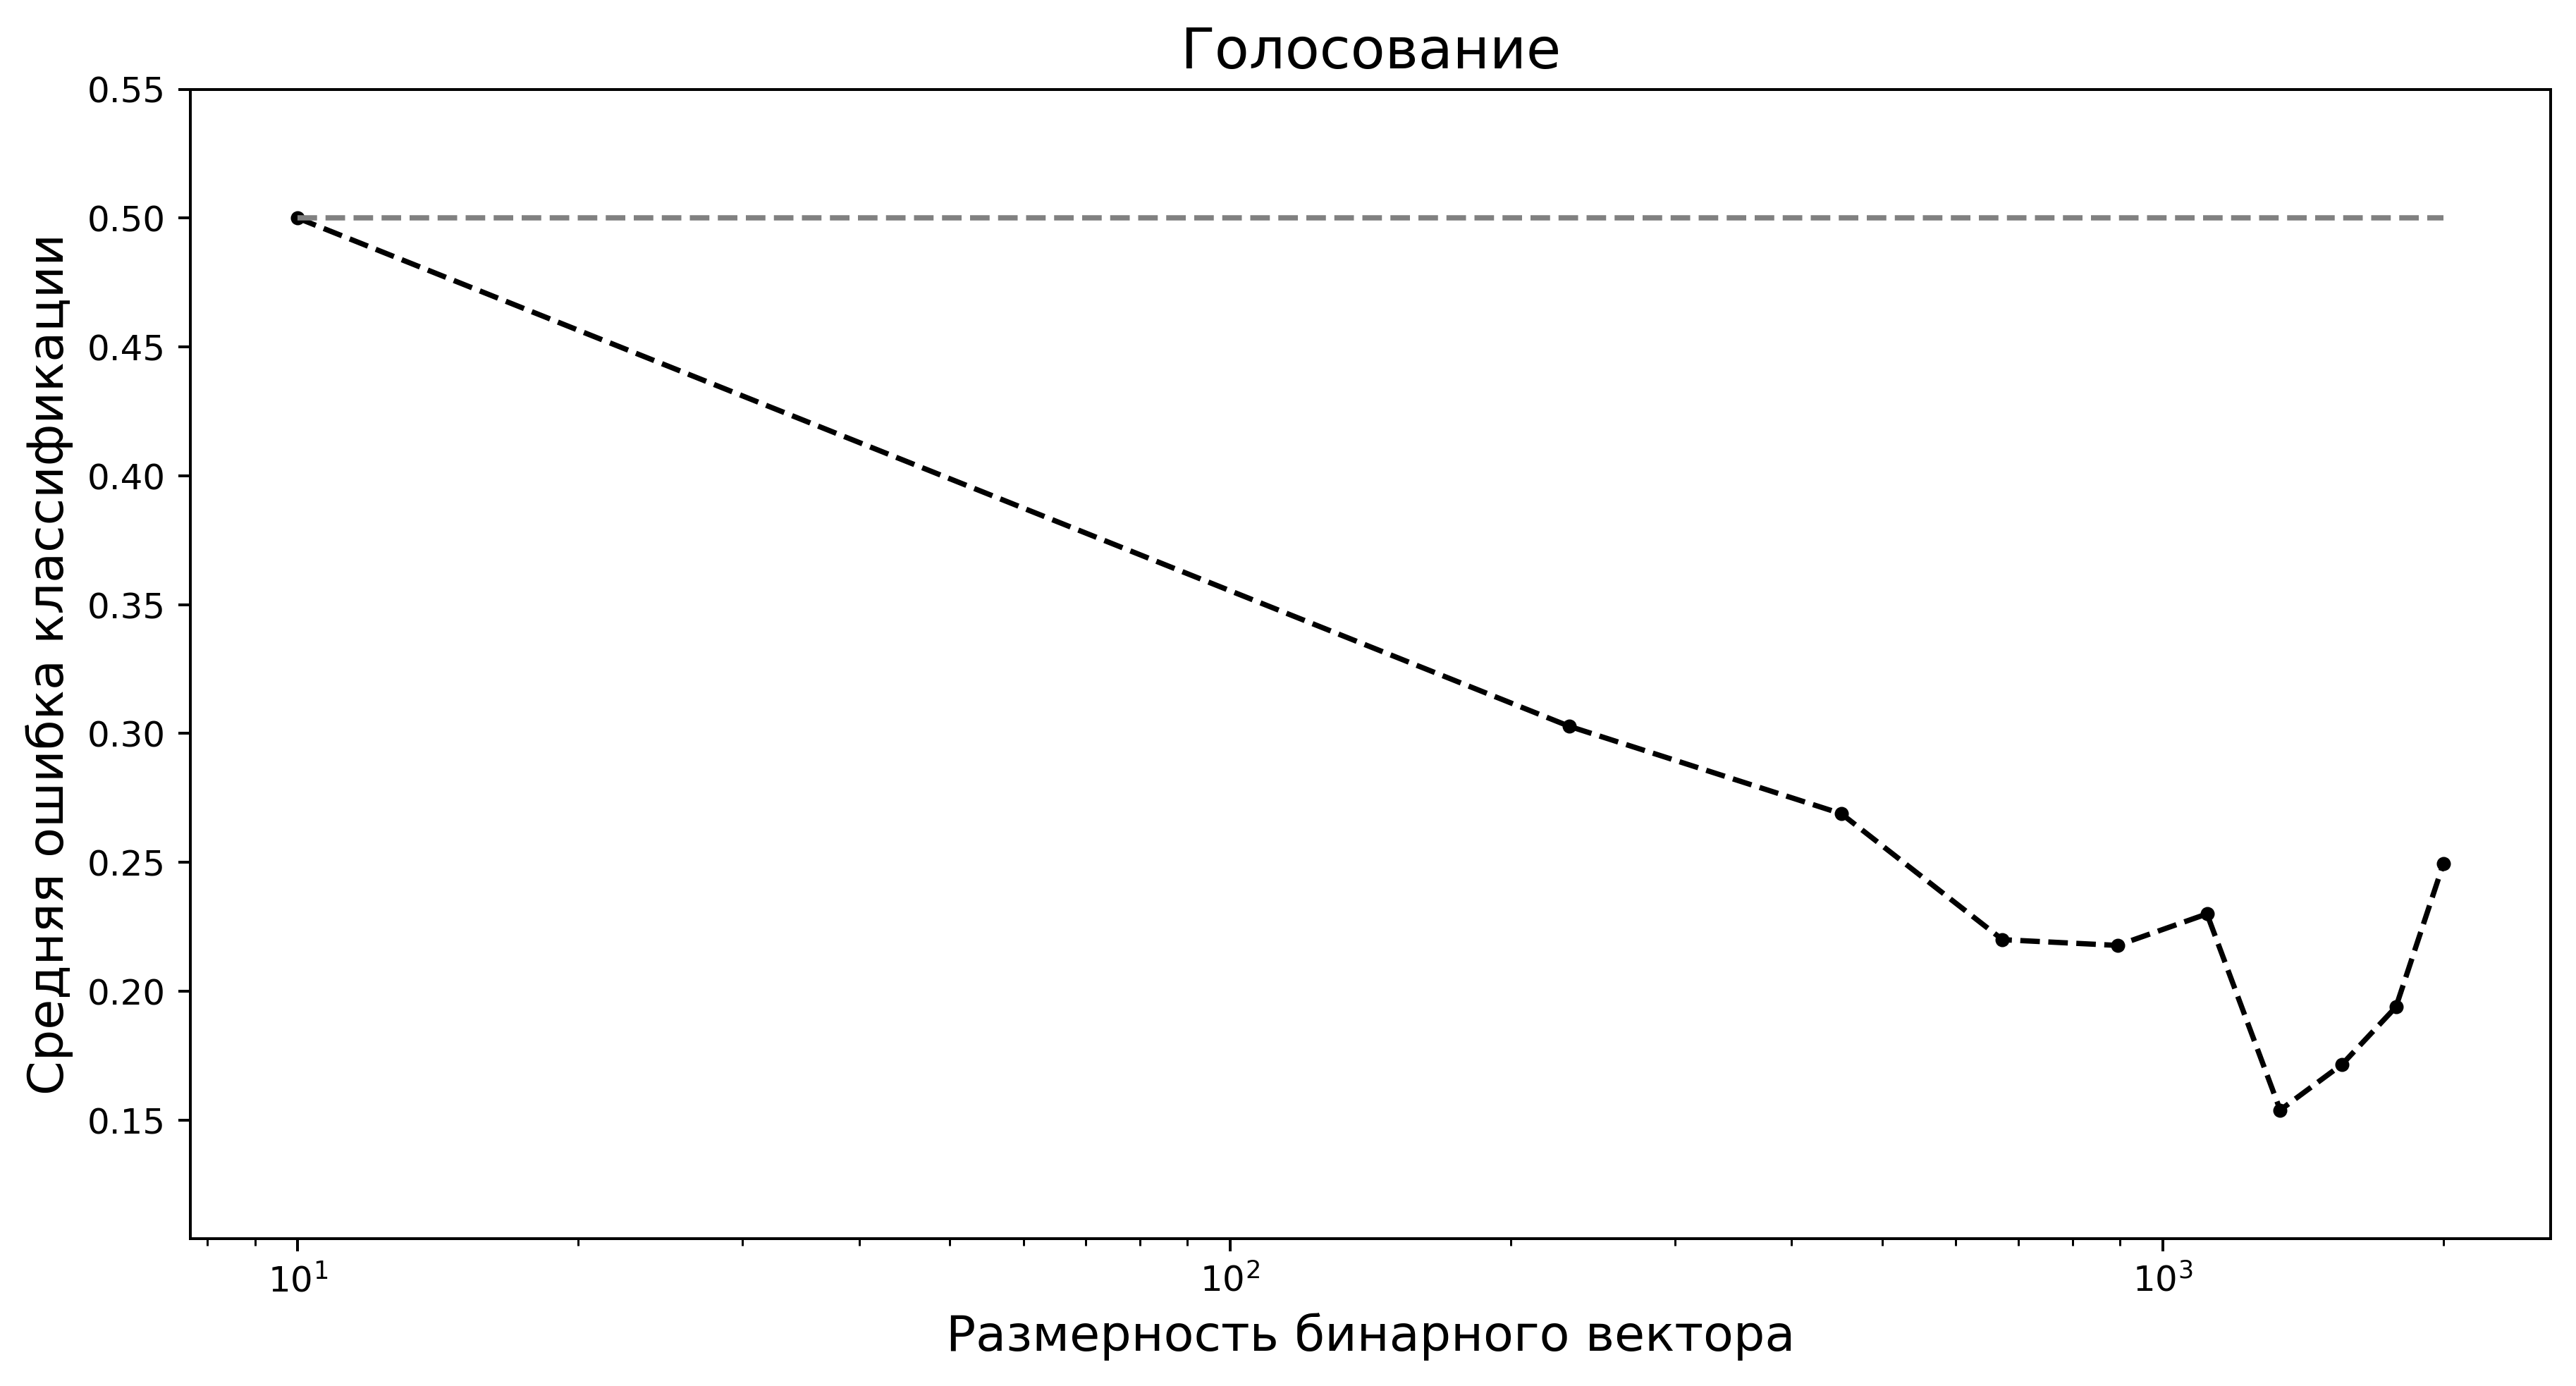

In [73]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=360)
ax.set_xscale('log')
plt.plot(x, y, linestyle="--", marker=".", color="black")
plt.hlines(0.5, np.min(x), np.max(x), linestyle="--", color='gray')
plt.ylim([y.min() - 0.05, y.max() + 0.05])
#plt.xlim([0, 100])
plt.xlabel('Размерность бинарного вектора', fontsize=14)
plt.ylabel('Средняя ошибка классификации', fontsize=14)
plt.title('Голосование', fontsize=16)
plt.savefig('Voting_2_auto_Harr.png', bbox_inches='tight')
plt.show()

In [78]:
y[0] =collect_data_for_graph(10)

10
T	: (10, 10) 
UU	: (16384, 10)
--- 20.362800359725952 seconds ---


In [79]:
optimal_N = np.argmin(y)
print("оптимальный размер скрытого слоя:", ps[optimal_N],
      "\nоценка ошибки (accuracy):", y[optimal_N])

оптимальный размер скрытого слоя: 1336.6666666666667 
оценка ошибки (accuracy): 0.15388888888888896


In [68]:
1 - y[optimal_N]

0.8433333333333334

In [67]:
# y = ([0.5       , 0.32333333, 0.27      , 0.21444444, 0.23222222, 0.20888889, 0.15666667, 0.16888889, 0.19277778, 0.24944444])